In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

#1. Create a random graph with the following conditions:
This is a weighted and directed graph.
The number of nodes: 6.
The number of edges: 10.
The weight of each edge is a random float number from 1 to 10.
Each node has a label which is an uppercase alphabet character from A to F.
You can use networkx or define your own Graph class.

{('A', 'C'): Text(-0.21537883367164046, -0.27113595520367595, '1.9'),
 ('A', 'B'): Text(-0.2853908222345553, 0.042887631781159466, '3.4'),
 ('C', 'E'): Text(0.018170693642305134, -0.3583546418237914, '7.7'),
 ('E', 'C'): Text(0.018170693642305134, -0.3583546418237914, '8.5'),
 ('E', 'B'): Text(-0.05184129492060973, -0.04433105483895598, '4.6'),
 ('B', 'C'): Text(0.0690153571282688, -0.11836785784731825, '9.4'),
 ('F', 'B'): Text(-0.23327818712507403, 0.33115455520462317, '8.8'),
 ('F', 'A'): Text(-0.5176723779249833, 0.17838645784826546, '4.8'),
 ('D', 'C'): Text(0.5695136728455918, -0.1340554030093085, '1.3')}

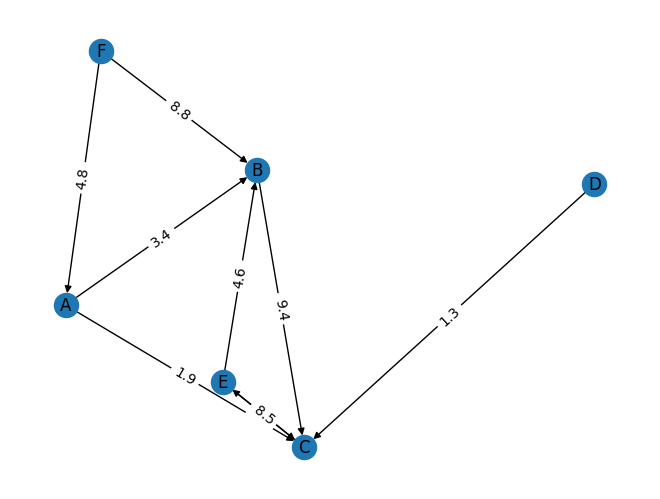

In [5]:
num_edges = 10

node_labels = "ABCDEF"
node_list = list(node_labels)
num_nodes = len(node_list)

G = nx.DiGraph()
edges = []

for i in range(num_edges):
    source, target = random.sample(node_list, 2)
    weight = round(random.uniform(1,10), 1)
    edge = (source, target, weight)
    edges.append(edge)

G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)


labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)


#2. Use the graph from requirement 1 to solve these problems:
Display the sparse and dense adjacency matrix of this graph.
Display the adjacency list.
Calculate the graph diameter.
Print the number of in-edges and out-edges of a node which entered from the keyboard.
Write a function to print the shortest path of 2 nodes.
Write functions to print all in-edges and out-edges of a node.

  (0, 1)	1.9
  (0, 3)	3.4
  (1, 2)	7.7
  (2, 1)	8.5
  (2, 3)	4.6
  (3, 1)	9.4
  (4, 0)	4.8
  (4, 3)	8.8
  (5, 1)	1.3
[[0.  1.9 0.  3.4 0.  0. ]
 [0.  0.  7.7 0.  0.  0. ]
 [0.  8.5 0.  4.6 0.  0. ]
 [0.  9.4 0.  0.  0.  0. ]
 [4.8 0.  0.  8.8 0.  0. ]
 [0.  1.3 0.  0.  0.  0. ]]
Graph diameter: 17.1
Graph diameter: 12.8
Graph diameter: 12.8
IN-edges of node B: []
OUT-edges of node B: []
Shortest path from A -> B: 
A->B
All in-edges of node of node J
All out-edges of node of node J


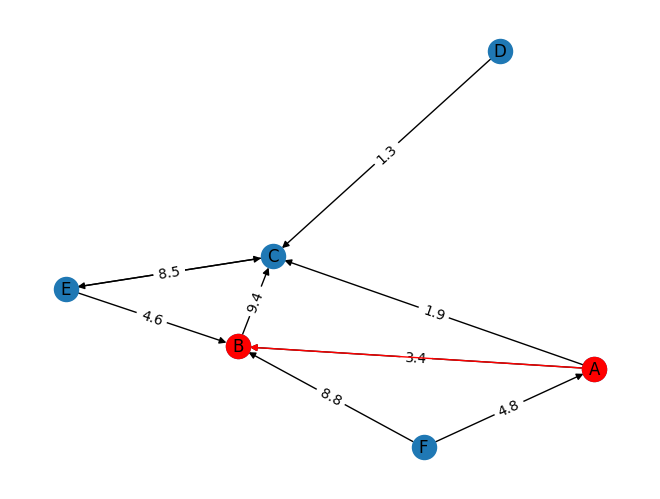

In [6]:
A=nx.adjacency_matrix(G)
print(A)

A_dense=A.todense()
print(A_dense)

nx.to_pandas_adjacency(G)

diameter=max([max(j.values()) for (i,j) in nx.shortest_path_length(G,weight='weight')])
print(f"Graph diameter: {diameter}")

if nx.is_connected(G.to_undirected()):
  graph_diameter=nx.diameter(G.to_undirected(),weight='weight')
  print(f"Graph diameter: {graph_diameter}")

if nx.is_connected(G.to_undirected()):
  graph_diameter=nx.diameter(G.to_undirected(),weight='weight')
  print(f"Graph diameter: {graph_diameter}")

print(f"IN-edges of node B: {G.in_degree('J')}")
print(f"OUT-edges of node B: {G.out_degree('J')}")

def shortest_path(source,target):
  path=nx.shortest_path(G,source=source,target=target, weight='weight', method="dijkstra")

  print(f"Shortest path from {source} -> {target}: ")
  print("->".join(map(str, path)))

  return path

path = shortest_path("A", "B")

pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r')


def print_all_in_edges(G, v):
    print(f"All in-edges of node of node {v}")
    in_edges = G.in_edges(v)
    for (s, t) in in_edges:
        print(f"{s} ---> {t}")


def print_all_out_edges(G, v):
    print(f"All out-edges of node of node {v}")
    out_edges = G.out_edges(v)
    for (s, t) in out_edges:
        print(f"{s} ---> {t}")

print_all_in_edges(G, "J")

print_all_out_edges(G, "J")

#3. Write a program to read a file containing edge information of an undirected graph and store its dense adjacency matrix into a file.
Input: a file has format as follow:

Node1 Node2 Weight

0         1          2

0         2          4

0         5          1

1         3          5

1         5          2

2         4          6

3         4          3

4         6          2


Output: a file contains the dense adjacency matrix of this graph.

In [7]:
edge_file = "edges.txt"
adj_file = "adjacency.xlsx"

f = open(edge_file, "r")

edges = []
for x in f:
    edge_infor = x.split(" ")
    try:
        edge = (int(edge_infor[0]), int(edge_infor[1]), int(edge_infor[2]))
        edges.append(edge)
    except:
        continue

graph = nx.Graph()

graph.add_weighted_edges_from(edges)


data = nx.to_pandas_adjacency(graph)

data.to_excel(adj_file, sheet_name='data', index=False)
nx.to_pandas_adjacency(graph)

,0,1,2,5,3,4,6
0,0.0,2.0,4.0,1.0,0.0,0.0,0.0
1,2.0,0.0,0.0,2.0,5.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,6.0,0.0
5,1.0,2.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.0,0.0,0.0,0.0,3.0,0.0
4,0.0,0.0,6.0,0.0,3.0,0.0,2.0
6,0.0,0.0,0.0,0.0,0.0,2.0,0.0


#Centrality Measures
**1. Write code to compute the following six centrality metrics for a graph using Networkx:**

Reading the dataset located in: /data/karate_edgelist.txt. Each row denotes the edge between two nodes. Caculate centrality meassures:

1.Degree centrality

2.Closeness centrality

3.Eigenvector centrality

4.PageRank

5.Betweenness centrality

6.Katz centrality

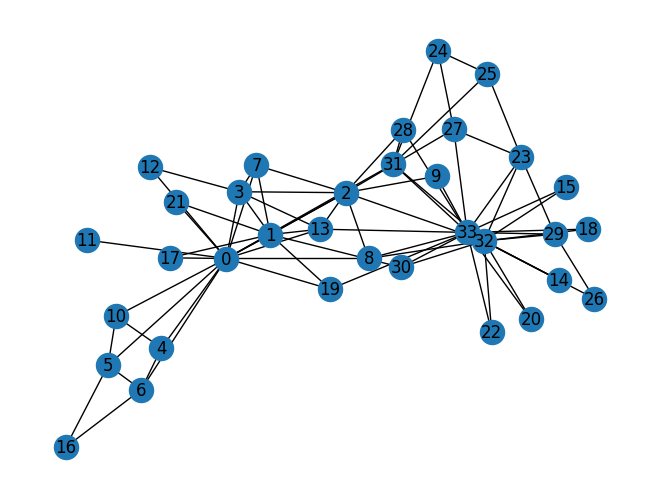

In [8]:
G = nx.read_edgelist('karate_edgelist.txt')
nx.draw(G, with_labels = True)
plt.show()

In [9]:
#1.Degree centrality
nx.degree_centrality(G)

{'0': 0.48484848484848486,
 '31': 0.18181818181818182,
 '21': 0.06060606060606061,
 '19': 0.09090909090909091,
 '17': 0.06060606060606061,
 '13': 0.15151515151515152,
 '12': 0.06060606060606061,
 '11': 0.030303030303030304,
 '10': 0.09090909090909091,
 '8': 0.12121212121212122,
 '7': 0.12121212121212122,
 '6': 0.12121212121212122,
 '5': 0.12121212121212122,
 '4': 0.09090909090909091,
 '3': 0.18181818181818182,
 '2': 0.30303030303030304,
 '1': 0.2727272727272727,
 '30': 0.09090909090909091,
 '9': 0.06060606060606061,
 '32': 0.36363636363636365,
 '28': 0.09090909090909091,
 '27': 0.12121212121212122,
 '16': 0.06060606060606061,
 '33': 0.5151515151515151,
 '14': 0.06060606060606061,
 '15': 0.06060606060606061,
 '18': 0.06060606060606061,
 '20': 0.06060606060606061,
 '22': 0.06060606060606061,
 '23': 0.15151515151515152,
 '29': 0.12121212121212122,
 '25': 0.09090909090909091,
 '24': 0.09090909090909091,
 '26': 0.06060606060606061}

In [10]:
#2.Closeness centrality
nx.closeness_centrality(G)

{'0': 0.5689655172413793,
 '31': 0.5409836065573771,
 '21': 0.375,
 '19': 0.5,
 '17': 0.375,
 '13': 0.515625,
 '12': 0.3707865168539326,
 '11': 0.36666666666666664,
 '10': 0.3793103448275862,
 '8': 0.5076923076923077,
 '7': 0.44,
 '6': 0.38372093023255816,
 '5': 0.38372093023255816,
 '4': 0.3793103448275862,
 '3': 0.4647887323943662,
 '2': 0.559322033898305,
 '1': 0.4852941176470588,
 '30': 0.4520547945205479,
 '9': 0.4342105263157895,
 '32': 0.515625,
 '28': 0.4520547945205479,
 '27': 0.4583333333333333,
 '16': 0.28448275862068967,
 '33': 0.55,
 '14': 0.3707865168539326,
 '15': 0.3707865168539326,
 '18': 0.3707865168539326,
 '20': 0.3707865168539326,
 '22': 0.3707865168539326,
 '23': 0.39285714285714285,
 '29': 0.38372093023255816,
 '25': 0.375,
 '24': 0.375,
 '26': 0.3626373626373626}

In [11]:
#3.eigenvector centrality
nx.eigenvector_centrality(G, weight='weight',max_iter = 600)

{'0': 0.36340322152371823,
 '31': 0.19391235526467543,
 '21': 0.09502743886678545,
 '19': 0.15074069425877987,
 '17': 0.09502743886678545,
 '13': 0.23168960174762762,
 '12': 0.08727193009064159,
 '11': 0.05458375974340858,
 '10': 0.07882124525103748,
 '8': 0.20427198523945406,
 '7': 0.17597634635563317,
 '6': 0.08254575066824002,
 '5': 0.08254575066824003,
 '4': 0.0788212452510375,
 '3': 0.21762871206321316,
 '2': 0.32130498941520813,
 '1': 0.26926245420725053,
 '30': 0.14187116747780765,
 '9': 0.10397399253360913,
 '32': 0.30434830432778526,
 '28': 0.13310024335175433,
 '27': 0.13549254883813314,
 '16': 0.024796904964651582,
 '33': 0.37091821010145454,
 '14': 0.10142748835443074,
 '15': 0.10142748835443074,
 '18': 0.10142748835443074,
 '20': 0.10142748835443074,
 '22': 0.10142748835443074,
 '23': 0.15125166304922122,
 '29': 0.1355731646608959,
 '25': 0.06064480712266924,
 '24': 0.05858677685320158,
 '26': 0.0760769040517285}

In [12]:
#4.PageRank Centrality
nx.pagerank(G, weight='weight')

{'0': 0.09789686019331435,
 '31': 0.03749657233342063,
 '21': 0.014681068329348065,
 '19': 0.019801658670267775,
 '17': 0.014681068329348065,
 '13': 0.029841303693564695,
 '12': 0.014738664798770302,
 '11': 0.009612449263038982,
 '10': 0.022082833574226392,
 '8': 0.02481123690560326,
 '7': 0.024720713352644988,
 '6': 0.029239344307407048,
 '5': 0.029239344307407048,
 '4': 0.022082833574226392,
 '3': 0.03618499594160287,
 '2': 0.05780553687161427,
 '1': 0.05366914022580437,
 '30': 0.019765741927190116,
 '9': 0.014445784534367661,
 '32': 0.07291854442300538,
 '28': 0.019757942938627582,
 '27': 0.025866469140843614,
 '16': 0.01683872691539262,
 '33': 0.10241745374804112,
 '14': 0.014697122860881033,
 '15': 0.014697122860881033,
 '18': 0.014697122860881033,
 '20': 0.014697122860881033,
 '22': 0.014697122860881033,
 '23': 0.031828243882603455,
 '29': 0.026557846618628755,
 '25': 0.021144607716618222,
 '24': 0.0212114411565215,
 '26': 0.015175958022145254}

In [13]:
#5.Betweenness centrality
nx.betweenness_centrality(G)

{'0': 0.4376352813852815,
 '31': 0.13827561327561327,
 '21': 0.0,
 '19': 0.03247504810004811,
 '17': 0.0,
 '13': 0.04586339586339585,
 '12': 0.0,
 '11': 0.0,
 '10': 0.0006313131313131313,
 '8': 0.04803541366041367,
 '7': 0.0,
 '6': 0.029987373737373736,
 '5': 0.029987373737373736,
 '4': 0.0006313131313131313,
 '3': 0.012224927849927847,
 '2': 0.14397246272246272,
 '1': 0.06151244588744589,
 '30': 0.013780663780663773,
 '9': 0.0008477633477633478,
 '32': 0.14650974025974026,
 '28': 0.0017947330447330447,
 '27': 0.022333453583453587,
 '16': 0.0,
 '33': 0.3050219456469456,
 '14': 0.0,
 '15': 0.0,
 '18': 0.0,
 '20': 0.0,
 '22': 0.0,
 '23': 0.017613636363636363,
 '29': 0.0029220779220779218,
 '25': 0.0038404882154882162,
 '24': 0.0022095959595959595,
 '26': 0.0}

In [14]:
#6.Katz Centrality
Katz_Centrality = nx.katz_centrality(G)

**2. Construct a graph from adjacency matrix in the adj_matrix.csv**

Reading the dataset located in: /data/adj_matrix.csv. The file denotes a adjacency matrix of a graph. Caculate centrality meassures:

1.Degree centrality

2.Closeness centrality

3.Eigenvector centrality

4.PageRank

5.Betweenness centrality

6.Katz centrality

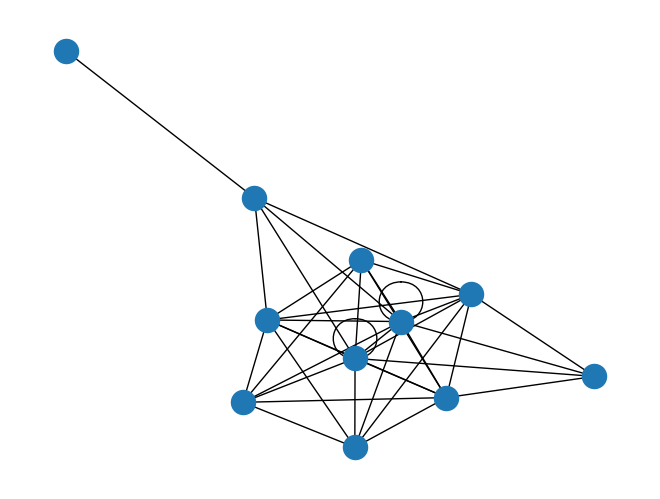

In [16]:
input_data = pd.read_csv('adj_matrix.csv', index_col=0)
G = nx.Graph(input_data.values)
nx.draw(G)

In [17]:
#1.Degree centrality
nx.degree_centrality(G)

{0: 0.8,
 1: 0.6000000000000001,
 2: 0.6000000000000001,
 3: 0.5,
 4: 1.1,
 5: 0.6000000000000001,
 6: 0.8,
 7: 0.8,
 8: 0.1,
 9: 1.1,
 10: 0.4}

In [18]:
#2.Closeness centrality
nx.closeness_centrality(G)

{0: 0.7692307692307693,
 1: 0.6666666666666666,
 2: 0.6666666666666666,
 3: 0.6666666666666666,
 4: 0.9090909090909091,
 5: 0.6666666666666666,
 6: 0.8333333333333334,
 7: 0.8333333333333334,
 8: 0.4166666666666667,
 9: 0.9090909090909091,
 10: 0.5882352941176471}

In [19]:
#3.eigenvector centrality
nx.eigenvector_centrality(G, weight='weight',max_iter = 600)

{0: 0.33972818116994896,
 1: 0.2827380288237043,
 2: 0.2827380288237043,
 3: 0.20385971895592936,
 4: 0.41246714216734126,
 5: 0.2770310271575898,
 6: 0.33109305174651593,
 7: 0.34016631214475956,
 8: 0.027279530158487143,
 9: 0.41246714216734126,
 10: 0.2001499779612994}

In [20]:
#4.PageRank Centrality
nx.pagerank(G, weight='weight')

{0: 0.10625318740035337,
 1: 0.08185301668347511,
 2: 0.08185301668347511,
 3: 0.08246539353387275,
 4: 0.1315620458916708,
 5: 0.08191853286309822,
 6: 0.10843571839431078,
 7: 0.10762882364928734,
 8: 0.02765582349473827,
 9: 0.1315620458916708,
 10: 0.058812395514047676}

In [21]:
#5.Betweenness centrality
nx.betweenness_centrality(G)

{0: 0.03148148148148148,
 1: 0.003703703703703704,
 2: 0.003703703703703704,
 3: 0.2,
 4: 0.09444444444444444,
 5: 0.003703703703703704,
 6: 0.06851851851851852,
 7: 0.055555555555555546,
 8: 0.0,
 9: 0.09444444444444444,
 10: 0.0}

In [22]:
#6.Katz Centrality
Katz_Centrality = nx.katz_centrality(G)